In [28]:
import pandas as pd
import numpy as np

In [29]:
ComPricesData=pd.read_csv('file:///E:/Data%20Science/Ivy%20Python%20&%20Machine%20Learning,Deep%20Learning/Python%20Datasets/Regression%20Datasets/ComputerPricesData.csv',sep=",",
                         encoding='latin-1')

In [30]:
ComPricesData.tail()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35
6258,2490,100,850,16,17,yes,no,yes,39,35


In [31]:
ComPricesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [32]:
round(ComPricesData.describe(),2)

,price,speed,hd,ram,screen,ads,trend
count,6259.00,6259.00,6259.00,6259.00,6259.00,6259.00,6259.00
mean,2219.58,52.01,416.60,8.29,14.61,221.30,15.93
std,580.80,21.16,258.55,5.63,0.91,74.84,7.87
min,949.00,25.00,80.00,2.00,14.00,39.00,1.00
25%,1794.00,33.00,214.00,4.00,14.00,162.50,10.00
50%,2144.00,50.00,340.00,8.00,14.00,246.00,16.00
75%,2595.00,66.00,528.00,8.00,15.00,275.00,21.50
max,5399.00,100.00,2100.00,32.00,17.00,339.00,35.00


In [33]:
ComPricesData.nunique()

price      808
speed        6
hd          59
ram          6
screen       3
cd           2
multi        2
premium      2
ads         34
trend       35
dtype: int64

In [34]:
ComPricesData.drop_duplicates()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [35]:
ComPricesData.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


# Data Description

In [36]:
ComPricesData.rename(columns={'hd':'Hard Drive',
                             'multi':'Multiple Ports'},inplace=True)

In [37]:
ComPricesData.head()

,price,speed,Hard Drive,ram,screen,cd,Multiple Ports,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [38]:
ComPricesData.nunique()

price             808
speed               6
Hard Drive         59
ram                 6
screen              3
cd                  2
Multiple Ports      2
premium             2
ads                34
trend              35
dtype: int64

# Basic Data Exploration

# Data Distribution for Target Variable

<AxesSubplot:>

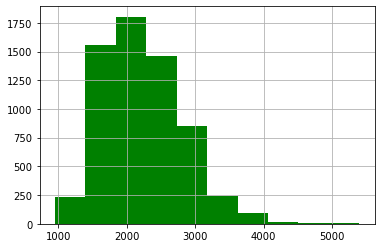

In [39]:
ComPricesData['price'].hist(color='green')

# Visual Explotary Data Analysis

# For Continous VS Continous(Target VS Predictor)

In [40]:
Conticol=['speed','Hard Drive','ads','trend']

array([[<AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'Hard Drive'}>],
       [<AxesSubplot:title={'center':'ads'}>,
        <AxesSubplot:title={'center':'trend'}>]], dtype=object)

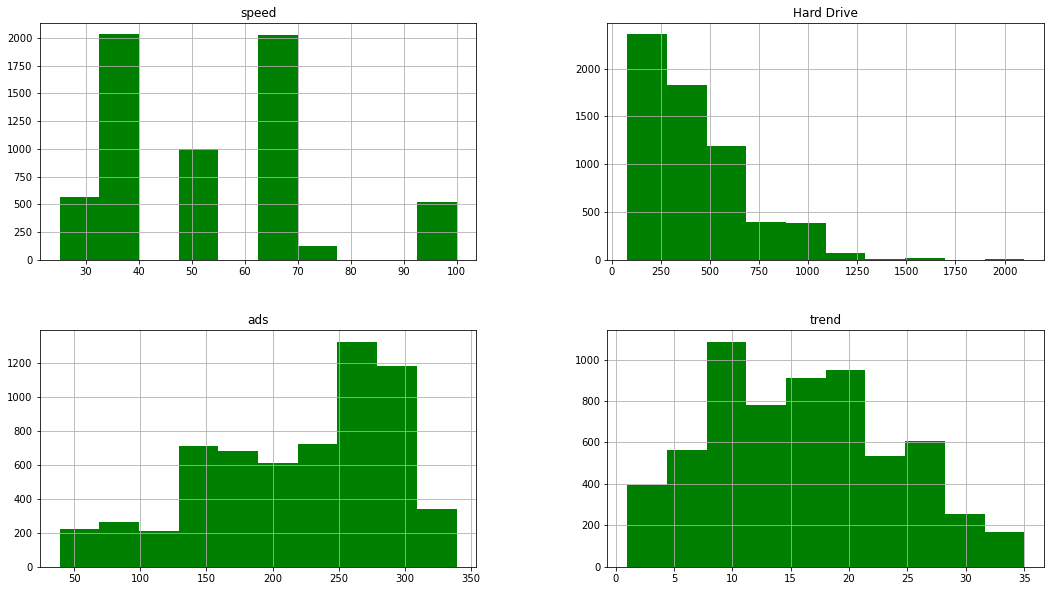

In [41]:
ComPricesData.hist(Conticol,figsize=(18,10),color='green')

# Histogram Results

Every Continous Predictors has satisfactory distribution for ML.

# Categorical VS Continous(Target VS Predictors)

In [42]:
ComPricesData.head()

,price,speed,Hard Drive,ram,screen,cd,Multiple Ports,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [43]:
Catcol1=['ram','cd','screen','Multiple Ports','premium']

In [44]:
def CatCol(inpdata,CaCol):
    import matplotlib.pyplot as plt
    
    fig,subplot=plt.subplots(nrows=1,ncols=len(CaCol),figsize=(10,5))
    fig.suptitle('Bar Charts of:'+str(CaCol))
    
    
    for colname,plotnumber in zip(CaCol,range(len(CaCol))):
        inpdata.groupby(colname).size().plot(kind='bar',ax=subplot[plotnumber])

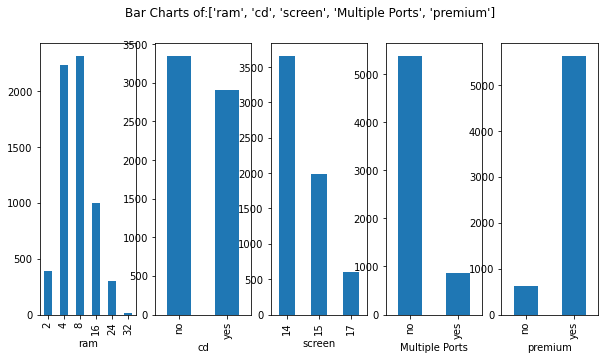

In [45]:
CatCol(ComPricesData,Catcol1)

# Bar Charts Results

# Missing Values

In [46]:
print(ComPricesData.isnull().sum())

price             0
speed             0
Hard Drive        0
ram               0
screen            0
cd                0
Multiple Ports    0
premium           0
ads               0
trend             0
dtype: int64


# Outliers Treatment

# Feature Selection

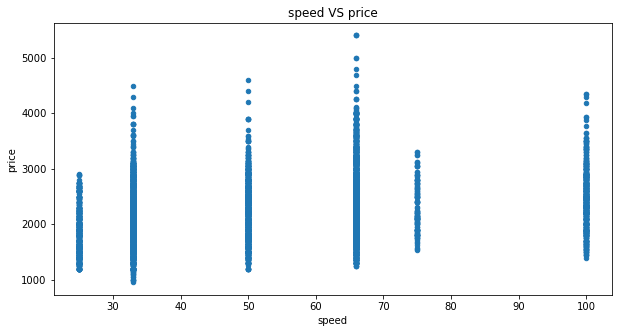

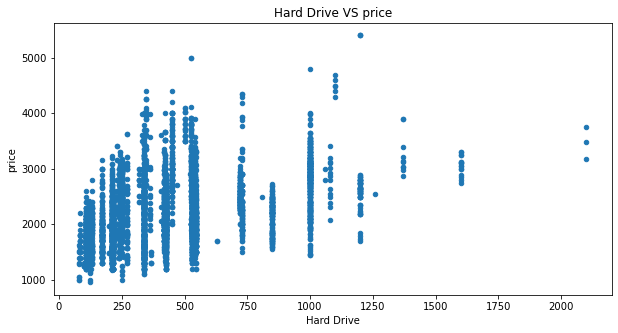

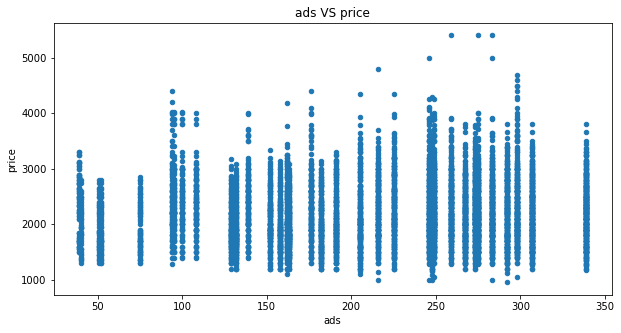

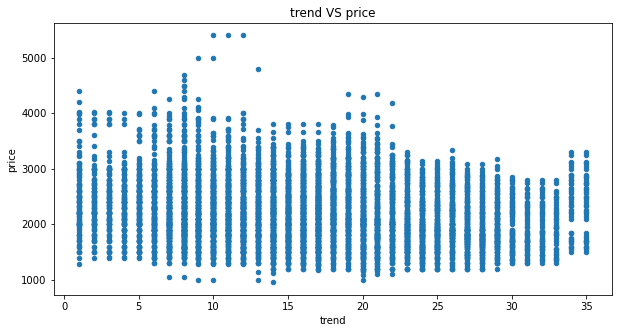

In [47]:
conticol=['speed','Hard Drive','ads','trend']

for conpredictor in conticol:
    ComPricesData.plot.scatter(x=conpredictor,y='price',figsize=(10,5),title=conpredictor+" " +"VS"+" " "price")
    

In [48]:
conticol1=['price','speed','Hard Drive','ads','trend']
subset=round(ComPricesData[conticol1].corr(),2)
subset

,price,speed,Hard Drive,ads,trend
price,1.00,0.30,0.43,0.05,-0.20
speed,0.30,1.00,0.37,-0.22,0.41
Hard Drive,0.43,0.37,1.00,-0.32,0.58
ads,0.05,-0.22,-0.32,1.00,-0.32
trend,-0.20,0.41,0.58,-0.32,1.00


In [49]:
subset['price'][abs(subset['price'])>=0.2]

price         1.00
speed         0.30
Hard Drive    0.43
trend        -0.20
Name: price, dtype: float64

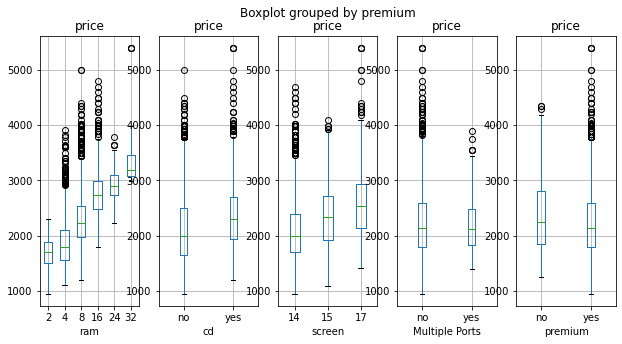

In [50]:
catcol1=['ram','cd','screen','Multiple Ports','premium']
import matplotlib.pyplot as plt

fig,plotcanvas=plt.subplots(nrows=1,ncols=len(catcol1),figsize=(10,5))

for catpredictor1,i in zip(catcol1,range(len(catcol1))):
    ComPricesData.boxplot(column='price',by=catpredictor1,figsize=(10,5),vert=True,ax=plotcanvas[i])

In [51]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [52]:
CategoricalPredictorList=['ram','cd','screen','Multiple Ports','premium']
FunctionAnova(inpData=  ComPricesData, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ram is correlated with price | P-Value: 0.0
cd is correlated with price | P-Value: 5.439449136508735e-56
screen is correlated with price | P-Value: 1.7979337838597882e-132
Multiple Ports is NOT correlated with price | P-Value: 0.1877771427064562
premium is correlated with price | P-Value: 1.6228830638522487e-10


['ram', 'cd', 'screen', 'premium']

# Final Selected Columns for ML

In [53]:
FinalColumn=['ram', 'cd', 'screen', 'premium','speed','Hard Drive','trend']
Dataforml12=ComPricesData[FinalColumn]
Dataforml12.head(20)

,ram,cd,screen,premium,speed,Hard Drive,trend
0,4,no,14,yes,25,80,1
1,2,no,14,yes,33,85,1
2,4,no,15,yes,25,170,1
3,8,no,14,no,25,170,1
4,16,no,14,yes,33,340,1
5,16,no,14,yes,66,340,1
6,4,yes,14,yes,25,170,1
7,2,no,14,yes,50,85,1
8,8,no,14,yes,50,210,1
9,4,no,15,yes,50,210,1


In [54]:
Dataforml12.to_pickle('Dataforml12.pickle')

# Data Pre Processing For Model

In [55]:
Dataforml12['cd'].replace({'no':2,'yes':1},inplace=True)

C:\Users\DIP\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [56]:
Dataforml12['premium'].replace({'no':2,'yes':1},inplace=True)

In [57]:
Dataforml12.head(10)

,ram,cd,screen,premium,speed,Hard Drive,trend
0,4,2,14,1,25,80,1
1,2,2,14,1,33,85,1
2,4,2,15,1,25,170,1
3,8,2,14,2,25,170,1
4,16,2,14,1,33,340,1
5,16,2,14,1,66,340,1
6,4,1,14,1,25,170,1
7,2,2,14,1,50,85,1
8,8,2,14,1,50,210,1
9,4,2,15,1,50,210,1


In [58]:
Dataforml12['price']=ComPricesData['price']

<ipython-input-58-fff94a2cb465>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataforml12['price']=ComPricesData['price']


# Machine Learning: Splitting the data into Training and Testing sample

In [59]:
Dataforml12.columns

Index(['ram', 'cd', 'screen', 'premium', 'speed', 'Hard Drive', 'trend',
       'price'],
      dtype='object')

In [60]:
Predictors=['ram', 'cd', 'screen', 'premium','speed','Hard Drive','trend']
Target='price'

In [61]:
X=Dataforml12[Predictors].values
Y=Dataforml12[Target].values

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=350)

In [63]:
np.set_printoptions(suppress=True)
X_train[0:4]


array([[ 16,   1,  14,   1,  50, 528,  17],
       [  4,   2,  14,   1,  33, 130,   4],
       [  4,   2,  14,   1,  25, 214,   9],
       [  8,   2,  15,   1,  50, 212,  15]], dtype=int64)

In [64]:
Y_train[0:4]

array([2495, 2090, 1944, 2225], dtype=int64)

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()


PredictorScalerFit=PredictorScaler.fit(X)


X=PredictorScalerFit.transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=410)

In [66]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4381, 7)
(4381,)
(1878, 7)
(1878,)


# Multiple Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
RegModel=LinearRegression()

In [69]:
print(RegModel)

LinearRegression()


In [70]:
LREG=RegModel.fit(X_train,Y_train)
from sklearn import metrics
print('R Squared Valueis:',metrics.r2_score(Y_train,LREG.predict(X_train)))

R Squared Valueis: 0.7659600078402483


In [71]:
print('Model Validation & Accuracy')
prediction=LREG.predict(X_test)
TDR=pd.DataFrame(data=X_test,columns=Predictors)
TDR[Target]=Y_test
TDR[('Predicted'+Target)]=np.round(prediction)

print('Calculating error for each rows')
TDR['APE']=100*((abs(TDR['price']-TDR['Predictedprice']))/TDR['price'])

print(TDR[[Target,'Predicted'+Target,'APE']].head())
MeanAPE=np.mean(TDR['APE'])
MedianAPE=np.median(TDR['APE'])
ACC=100-MeanAPE
MACC=100-MedianAPE
print('Mean Avg Accuracy',ACC)
print('Median Avg Accuracy',MACC)

def acc_score(ori,predic):
    MAPE=np.mean(100*(np.abs(ori-predic)/ori))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(acc_score,greater_is_better=True)

from sklearn.model_selection import cross_val_score
accuracy_val=cross_val_score(RegModel,X,Y,cv=10,scoring=custom_scoring)
print('Accuracy for 10 cross validation',accuracy_val)
print('Accuracy For the model',round(accuracy_val.mean(),2))


Model Validation & Accuracy
Calculating error for each rows
   price  Predictedprice        APE
0   3239          2860.0  11.701142
1   1974          2154.0   9.118541
2   3094          2756.0  10.924370
3   2095          2534.0  20.954654
4   2190          2028.0   7.397260
Mean Avg Accuracy 90.1249071730293
Median Avg Accuracy 92.30959163248023
Accuracy for 10 cross validation [86.15554819 87.44046022 89.62707327 88.37625646 90.94578963 92.08064797
 91.78658855 90.88833101 89.8015595  87.04907041]
Accuracy For the model 89.42


In [72]:
LREG.coef_

array([ 1415.20091292,  -122.10541422,   376.80957941,   538.71876431,
         681.92049158,  1477.3857122 , -1806.73625223])

In [73]:
LREG.intercept_

2163.2568454987213

# Decision Trees

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
RegModel=DecisionTreeRegressor(max_depth=10,criterion='mse')
print(RegModel)

DecisionTreeRegressor(max_depth=10)


In [76]:
from sklearn import metrics
DT=RegModel.fit(X_train,Y_train)

In [77]:
print('R2 Value is:',metrics.r2_score(Y_train,DT.predict(X_train)))

R2 Value is: 0.9363158065756058


Model Validation & Accuracy Test
   price  Predictedprice        APE
0   3239          3239.0   0.000000
1   1974          2140.0   8.409321
2   3094          2765.0  10.633484
3   2095          2244.0   7.112172
4   2190          2125.0   2.968037
Mean Accuracy On Test Data: 93.72638390240581
Median Accuracy On Test Data: 95.2
10 Fold cross validation Accuracy [88.3106046  92.6529051  93.3572721  91.05176744 91.38072408 92.07140254
 90.74074484 92.5532678  92.98416322 79.4551919 ]
Final Accuracy of Model 90.46


<AxesSubplot:>

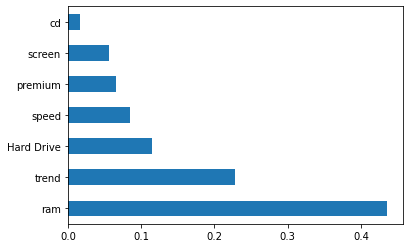

In [78]:
print("Model Validation & Accuracy Test")
prediction=DT.predict(X_test)
TDR=pd.DataFrame(data=X_test,columns=Predictors)
TDR[Target]=Y_test
TDR[('Predicted'+Target)]=np.round(prediction)
TDR['APE']=100*((abs(TDR['price']-TDR['Predictedprice']))/TDR['price'])
print(TDR[[Target,'Predicted'+Target,'APE']].head())

MeanAPE=np.mean(TDR['APE'])
MedianAPE=np.median(TDR['APE'])

ACC=100-MeanAPE
MACC=100-MedianAPE
print('Mean Accuracy On Test Data:',ACC)
print('Median Accuracy On Test Data:',round(MACC.mean(),2))

def cross_fun(ori,pre):
    MAPE=np.mean(100*(np.abs(ori-pre)/ori))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(cross_fun,greater_is_better=True)

from sklearn.model_selection import cross_val_score
AV=cross_val_score(RegModel,X,Y,cv=10,scoring=custom_scoring)
print('10 Fold cross validation Accuracy',AV)
print('Final Accuracy of Model',round(AV.mean(),2))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Random Forest

RandomForestRegressor(max_depth=8, n_estimators=1300)
R2 Value is: 0.9139931418422926
Model Validation & Accuracy Calculations
   price  Predictedprice        APE
0   3239         3318.43   2.452300
1   1974         2106.82   6.728470
2   3094         2793.60   9.709114
3   2095         2243.55   7.090692
4   2190         2105.42   3.862100
5   2495         2593.77   3.958717
6   1149         1324.94  15.312446
7   1578         1640.25   3.944867
8   1499         1443.63   3.693796
9   1398         1450.74   3.772532
Mean Accuracy 93.37707698435976
Median Accuracy 94.89347358327291
10 Fold cross validation Accuracy [89.45391178 92.41612708 92.95082939 90.39801129 91.58343213 92.30780554
 91.54761009 92.70640518 92.94538559 83.75131709]
Final Accuracy of Model 91.01


<AxesSubplot:>

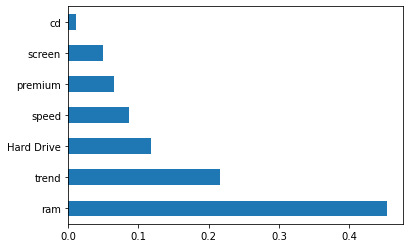

In [79]:
from sklearn.ensemble import RandomForestRegressor
RegModel=RandomForestRegressor(max_depth=8,n_estimators=1300,criterion='mse')
print(RegModel)
RF=RegModel.fit(X_train,Y_train)

from sklearn import metrics
print('R2 Value is:',metrics.r2_score(Y_train,RF.predict(X_train)))

print('Model Validation & Accuracy Calculations')
prediction=RF.predict(X_test)
TDR=pd.DataFrame(data=X_test,columns=Predictors)
TDR[Target]=Y_test
TDR[('Predicted'+Target)]=np.round((prediction),2)
TDR['APE']=100*((abs(TDR['price']-TDR['Predictedprice']))/TDR['price'])
print(TDR[[Target,'Predicted'+Target,'APE']].head(10))

MAPE=np.mean(TDR['APE'])
MedianAPE=np.median(TDR['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy',Accuracy)
print('Median Accuracy',MedianAccuracy)

def Acc_val(ori,pre):
    MAPE=np.mean(100*(np.abs(ori-pre)/ori))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Acc_val,greater_is_better=True)

from sklearn.model_selection import cross_val_score
Ac_Val=cross_val_score(RegModel,X,Y,cv=10,scoring=custom_scoring)
print('10 Fold cross validation Accuracy',Ac_Val)
print('Final Accuracy of Model',round(Ac_Val.mean(),2))

FI=pd.Series(RF.feature_importances_,index=Predictors)
FI.nlargest(10).plot(kind='barh')

# AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.01, n_estimators=1300)
R2 Score Is: 0.5420379293824813
Model Validation & Accuracy Calculations
   price  Predictedprice        APE
0   3239         2737.23  15.491510
1   1974         2391.81  21.165653
2   3094         2740.14  11.436975
3   2095         2332.46  11.334606
4   2190         2177.80   0.557078
5   2495         2551.29   2.256112
6   1149         1927.48  67.752829
7   1578         2086.43  32.219899
8   1499         1978.97  32.019346
9   1398         2005.92  43.484979
Mean Accuracy 84.29061065464474
Median Accuracy 87.8987229507988
10 Fold cross validation Accuracy [86.50384485 86.9256197  87.29452952 86.32054184 85.88252348 85.90550603
 83.38710735 80.96539567 76.64915054 69.34578359]
Final Accuracy of Model 82.92


<AxesSubplot:>

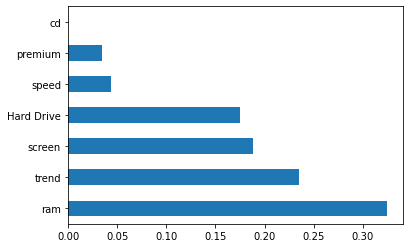

In [80]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(max_depth=2)
RegModel=AdaBoostRegressor(n_estimators=1300,base_estimator=DTR,learning_rate=0.01)
print(RegModel)
AB=RegModel.fit(X_train,Y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print('R2 Score Is:',metrics.r2_score(Y_train,AB.predict(X_train)))

print('Model Validation & Accuracy Calculations')
TDR=pd.DataFrame(data=X_test,columns=Predictors)
TDR[Target]=Y_test
TDR[('Predicted'+Target)]=np.round((prediction),2)
TDR['APE']=100*((abs(TDR['price']-TDR['Predictedprice']))/TDR['price'])
print(TDR[[Target,'Predicted'+Target,'APE']].head(10))

MAPE=np.mean(TDR['APE'])
MedianAPE=np.median(TDR['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy',Accuracy)
print('Median Accuracy',MedianAccuracy)

def Acc_value(ori,pre):
    MAPE=np.mean(100*(np.abs(ori-pre)/ori))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Acc_value,greater_is_better=True)


from sklearn.model_selection import cross_val_score
Ac_Val=cross_val_score(RegModel,X,Y,cv=10,scoring=custom_scoring)
print('10 Fold cross validation Accuracy',Ac_Val)
print('Final Accuracy of Model',round(Ac_Val.mean(),2))

FI=pd.Series(AB.feature_importances_,index=Predictors)
FI.nlargest(10).plot(kind='barh')

# XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1220, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
R2 Score is: 0.8696669093426127

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice        APE
0   3239     3198.399902   1.253476
1   1974     2041.130005   3.400709
2   3094     2807.739990   9.252101
3   2095     2386.840088  13.930314
4   2190     2144.050049   2.098171
5   2495     

<AxesSubplot:>

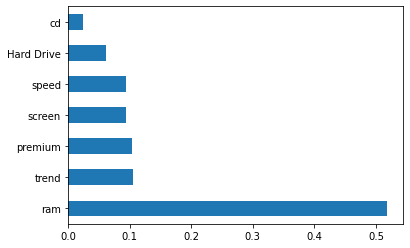

In [81]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,n_estimators=1220,booster='gbtree',learning_rate=0.01,objective='reg:squarederror')
print(RegModel)
XGB=RegModel.fit(X_train,Y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print('R2 Score is:',metrics.r2_score(Y_train,XGB.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')
TDR=pd.DataFrame(data=X_test,columns=Predictors)
TDR[Target]=Y_test
TDR[('Predicted'+Target)]=np.round((prediction),2)
TDR['APE']=100*((abs(TDR['price']-TDR['Predictedprice']))/TDR['price'])
print(TDR[[Target,'Predicted'+Target,'APE']].head(10))

MAPE=np.mean(TDR["APE"])
MedianAPE=np.median(TDR['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianAPE
print('Mean Accuracy is:',Accuracy)
print('Median Accuracy is:',MedianAccuracy)

def Acc_val(ori,pre):
    MAPE=np.mean(100*(np.abs(ori-pre)/ori))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Acc_val,greater_is_better=True)

from sklearn.model_selection import cross_val_score
Ac_val=cross_val_score(RegModel,X,Y,cv=10,scoring=custom_scoring)
print('10 Fold cross validation Accuracy',Ac_val)
print('Final Accuracy of Model',round(Ac_val.mean(),2))

FI=pd.Series(XGB.feature_importances_,index=Predictors)
FI.nlargest(10).plot(kind='barh')

# KNN

In [82]:
from sklearn.neighbors import KNeighborsRegressor
RegModel=KNeighborsRegressor(n_neighbors=6)
KN=RegModel.fit(X_train,Y_train)
prediction=KN.predict(X_test)
print(RegModel)

from sklearn import metrics
print('R2 Scoreis:',metrics.r2_score(Y_train,KN.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')
TDR=pd.DataFrame(data=X_test,columns=Predictors)
TDR[Target]=Y_test
TDR[('Predicted'+Target)]=np.round((prediction),2)
TDR['APE']=100*((abs(TDR['price']-TDR['Predictedprice']))/TDR['price'])
print(TDR[[Target,'Predicted'+Target,'APE']].head(10))

MAPE=np.mean(TDR['APE'])
MedianMAPE=np.median(TDR['APE'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean Accuracy is:',Accuracy)
print('Median Accuracy is:',MedianAccuracy)

def Acc_val(ori,pre):
    MAPE=np.mean(100*(np.abs(ori-pre)/ori))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Acc_val,greater_is_better=True)

from sklearn.model_selection import cross_val_score
Ac_val=cross_val_score(RegModel,X,Y,cv=10,scoring=custom_scoring)
print('10 Fold cross validation Accuracy',Ac_val)
print('Final Accuracy of Model',round(Ac_val.mean(),2))


KNeighborsRegressor(n_neighbors=6)
R2 Scoreis: 0.9049450690776101

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice        APE
0   3239         3155.50   2.577956
1   1974         2034.00   3.039514
2   3094         2869.33   7.261474
3   2095         2222.50   6.085919
4   2190         2136.00   2.465753
5   2495         2883.00  15.551102
6   1149         1461.17  27.168842
7   1578         1664.00   5.449937
8   1499         1499.00   0.000000
9   1398         1465.33   4.816166
Mean Accuracy is: 92.99479766890005
Median Accuracy is: 94.71704449805027
10 Fold cross validation Accuracy [90.34400992 91.21517649 92.40306096 91.33987459 92.20463068 92.86737489
 91.38481364 92.26137135 93.15230951 91.38782265]
Final Accuracy of Model 91.86


# Model Deplyoment

In [86]:
Target='price'


Predictors=[ 'Hard Drive', 'speed', 'ram','screen','trend']

X=Dataforml12[Predictors].values
Y=Dataforml12[Target].values

DataForMLCP=Dataforml12[Predictors]
DataForMLCP.to_pickle('DataForMLCOMP.pkl')


from sklearn.preprocessing import StandardScaler, MinMaxScaler



PredictorScaler=MinMaxScaler()


PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

print(X.shape)
print(Y.shape)

(6259, 5)
(6259,)


In [88]:
from sklearn.ensemble import RandomForestRegressor
RegModel=RandomForestRegressor(max_depth=8,n_estimators=900,criterion='mse')

Final_RFCOMP_Model=RegModel.fit(X,Y)

In [89]:
from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Acc_val,greater_is_better=True)

from sklearn.model_selection import cross_val_score
Ac_Val=cross_val_score(Final_RFCOMP_Model,X,Y,cv=10,scoring=custom_scoring)
print('10 Fold cross validation Accuracy',Ac_Val)
print('Final Accuracy of Model',round(Ac_Val.mean(),2))

10 Fold cross validation Accuracy [90.50498481 91.42424773 91.57425935 88.978797   89.23445163 89.62019347
 89.17077067 91.13607142 92.36085641 84.91907749]
Final Accuracy of Model 89.89


In [94]:
import pickle
import os


with open('Final_RFCOMP_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_RFCOMP_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\DIP


In [95]:
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    DataForML=pd.read_pickle('DataForMLCOMP.pkl')
    InputData=InputData.append(DataForML)
    
  
    
    
            
    Predictors=['Hard Drive', 'speed', 'ram','screen','trend']
    
  
    X=InputData[Predictors].values[0:Num_Inputs]
    
    X=PredictorScalerFit.transform(X)
    
    
    import pickle
    with open('Final_RFCOMP_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        
        fileReadStream.close()
            
    
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

    
     

In [97]:
NewSampleData=pd.DataFrame(
data=[[500,90,20,140,1],
     [230,30,6,13,1]],
columns=[ 'Hard Drive', 'speed', 'ram','screen','trend'])

print(NewSampleData)


FunctionPredictResult(InputData= NewSampleData)

   Hard Drive  speed  ram  screen  trend
0         500     90   20     140      1
1         230     30    6      13      1


,Prediction
0,3958.239492
1,2165.617600


In [98]:
def FunctionGeneratePrediction(inp_harddrive, inp_speed, inp_ram,inp_screen,inp_trend):
    SampleInputData=pd.DataFrame(
     data=[[inp_harddrive, inp_speed, inp_ram,inp_screen,inp_trend]],
     columns=['Hard Drive', 'speed', 'ram','screen','trend'])
    Predictions=FunctionPredictResult(InputData= SampleInputData)
    
    return(Predictions.to_json())
FunctionGeneratePrediction(inp_harddrive=500, 
                           inp_speed=45, 
                           inp_ram=4,
                           inp_screen=13.3,inp_trend=1
                             )

'{"Prediction":{"0":3591.6177527383}}'

In [99]:
!pip install flask

In [100]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [104]:
app = Flask(__name__)

@app.route('/my_prediction', methods=["GET"])
def prediction_api():
    try:
        harddrive_value=float(request.args.get('Hard Drive'))
        speed_value=float(request.args.get('speed'))
        ram_value=float(request.args.get('ram'))
        screen_value=float(request.args.get('screen'))
        trend_value=float(request.args.get('trend'))
                       
        prediction_from_api=FunctionGeneratePrediction(
                                                    inp_harddrive=harddrive_value, 
                                                    inp_speed=speed_value, 
                                                    inp_ram=ram_value,
                                                    inp_screen=screen_value,
                                                    inp_trend=trend_value

                                                        )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [105]:
import os
if __name__ =="__main__":
    
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Feb/2022 16:04:26] "GET /my_prediction?Hard%20Drive=500&speed=45&ram=6&screen=46&trend=1 HTTP/1.1" 200 -
